In [21]:
# First cell - Django setup
import os
import sys
import django
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd()  # Assuming your notebook is in the project root
sys.path.insert(0, str(project_root))

# Set Django settings module
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'TradeLens.settings')

# Allow Django async unsafe operations (needed for Jupyter notebooks)
os.environ.setdefault('DJANGO_ALLOW_ASYNC_UNSAFE', 'true')

# Configure Django
django.setup()

print("Django configured successfully!")

Django configured successfully!


In [22]:
from shared_utils.entities.service.EntityService import  EntityService


In [23]:
from shared_utils.entities.EntityModel import EntityModel

all_models = EntityModel.objects.all()

In [24]:
len(all_models)

471

In [25]:
# Import required libraries for PCA and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [26]:
# Extract embeddings and entity types - ONE POINT PER ENTITY
embeddings = []
entity_types = []
entity_ids = []
valid_models = []

print("Extracting embeddings and entity types for ALL entities...")

for model in all_models:
    if model.embedding is not None:
        embeddings.append(model.embedding)
        entity_types.append(model.entity_type)
        entity_ids.append(str(model.entity_id))
        valid_models.append(model)

# Convert to numpy arrays
embeddings_array = np.array(embeddings)
entity_types_array = np.array(entity_types)

print(f"=== ENTITY PLOTTING SUMMARY ===")
print(f"Total models in database: {len(all_models)}")
print(f"Models with valid embeddings: {len(embeddings)}")
print(f"Models without embeddings: {len(all_models) - len(embeddings)}")
print(f"✓ Each of the {len(embeddings)} entities will be plotted as ONE point on the scatter plot")
print(f"✓ Embedding dimensions per entity: {embeddings_array.shape[1]}")

print(f"\n=== ENTITY TYPE BREAKDOWN ===")
unique, counts = np.unique(entity_types_array, return_counts=True)
for entity_type, count in zip(unique, counts):
    print(f"  {entity_type}: {count} entities (will show as {count} points of the same color)")
    
print(f"\nTotal points that will appear on plot: {len(embeddings)}")


Extracting embeddings and entity types for ALL entities...
=== ENTITY PLOTTING SUMMARY ===
Total models in database: 471
Models with valid embeddings: 339
Models without embeddings: 132
✓ Each of the 339 entities will be plotted as ONE point on the scatter plot
✓ Embedding dimensions per entity: 384

=== ENTITY TYPE BREAKDOWN ===
  : 1 entities (will show as 1 points of the same color)
  api_model: 2 entities (will show as 2 points of the same color)
  document: 135 entities (will show as 135 points of the same color)
  meal_plan: 3 entities (will show as 3 points of the same color)
  recipe: 6 entities (will show as 6 points of the same color)
  training_session: 1 entities (will show as 1 points of the same color)
  view: 191 entities (will show as 191 points of the same color)

Total points that will appear on plot: 339


In [27]:
# Perform PCA to reduce dimensionality to 2D for visualization
print("Performing PCA...")

# Standardize the embeddings (recommended for PCA)
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings_array)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_scaled)

print(f"PCA completed!")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")
print(f"Reduced embeddings shape: {embeddings_2d.shape}")

# Create a DataFrame for plotting - ONE ROW PER ENTITY
df_plot = pd.DataFrame({
    'PC1': embeddings_2d[:, 0],
    'PC2': embeddings_2d[:, 1],
    'entity_type': entity_types_array,
    'entity_id': entity_ids
})

print(f"✓ Created plotting DataFrame with {len(df_plot)} rows")
print(f"✓ Each row represents ONE entity that will be plotted as ONE point")
print(f"✓ DataFrame shape: {df_plot.shape}")
print(f"✓ Ready to plot {len(df_plot)} entities on scatter plot")


Performing PCA...
PCA completed!
Explained variance ratio: [0.5891085  0.25858453]
Total explained variance: 0.8477
Reduced embeddings shape: (339, 2)
✓ Created plotting DataFrame with 339 rows
✓ Each row represents ONE entity that will be plotted as ONE point
✓ DataFrame shape: (339, 4)
✓ Ready to plot 339 entities on scatter plot


Creating scatter plot with 339 points (one per entity)...


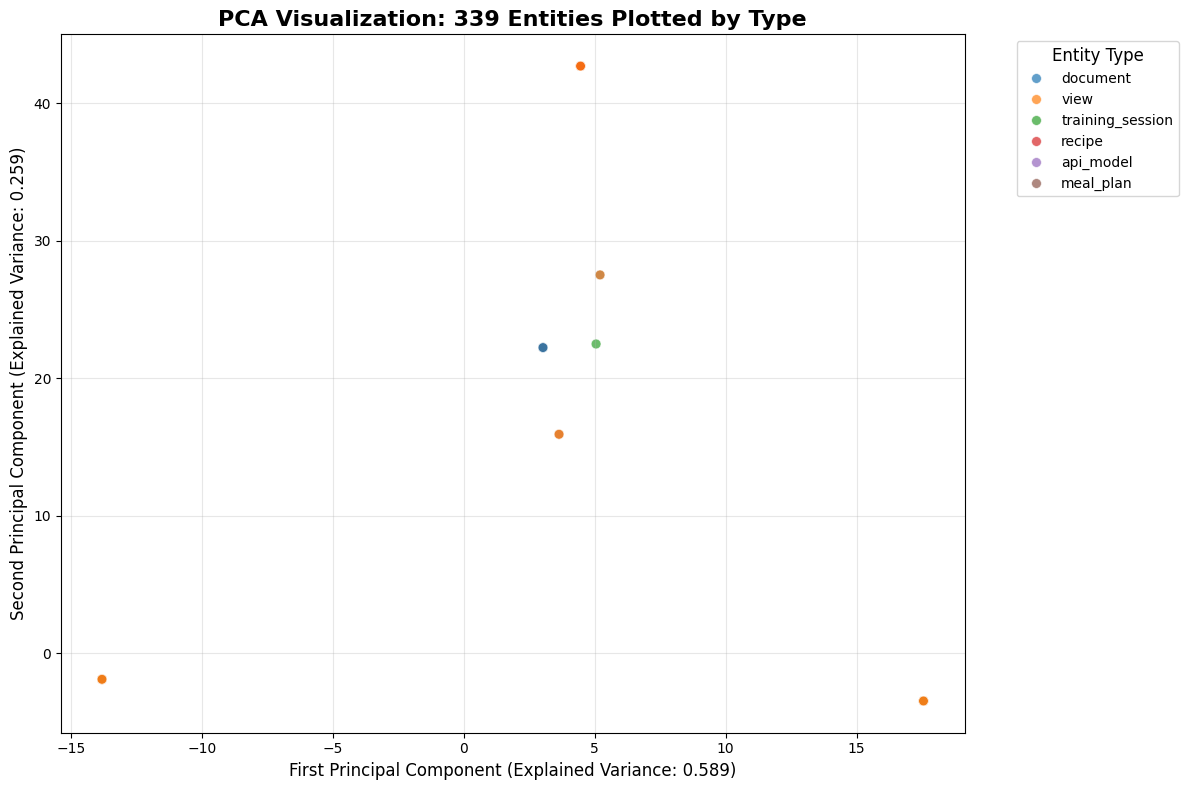

✓ Scatter plot completed!
✓ Total points plotted: 339 (= number of entities with embeddings)
✓ Entity types shown: 7
✓ Each point represents exactly ONE entity, colored by its entity_type
   - document: 135 points
   - view: 191 points
   - training_session: 1 points
   - recipe: 6 points
   - api_model: 2 points
   - meal_plan: 3 points
   - : 1 points


In [28]:
# Create scatter plot - ONE POINT PER ENTITY, COLORED BY ENTITY TYPE
plt.figure(figsize=(12, 8))

print(f"Creating scatter plot with {len(df_plot)} points (one per entity)...")

# Use seaborn for better color handling and aesthetics
# Each point represents exactly ONE entity, colored by its entity_type
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='entity_type', alpha=0.7, s=50)

plt.title(f'PCA Visualization: {len(df_plot)} Entities Plotted by Type', fontsize=16, fontweight='bold')
plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.3f})', fontsize=12)
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.3f})', fontsize=12)

# Improve legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Entity Type', title_fontsize=12)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

print(f"✓ Scatter plot completed!")
print(f"✓ Total points plotted: {len(df_plot)} (= number of entities with embeddings)")
print(f"✓ Entity types shown: {len(df_plot['entity_type'].unique())}")
print(f"✓ Each point represents exactly ONE entity, colored by its entity_type")

# Verify our plotting
for entity_type in df_plot['entity_type'].unique():
    count = len(df_plot[df_plot['entity_type'] == entity_type])
    print(f"   - {entity_type}: {count} points")


In [29]:
# Final Analysis Summary
print("=== FINAL PLOTTING VERIFICATION ===")
print(f"✓ Database entities: {len(all_models)}")
print(f"✓ Entities with embeddings: {len(embeddings_array)}")
print(f"✓ Points plotted on scatter plot: {len(df_plot)}")
print(f"✓ CONFIRMATION: Each entity = 1 point on graph")

print("\n=== PCA TECHNICAL DETAILS ===")
print(f"Original embedding dimensions: {embeddings_array.shape[1]}")
print(f"Reduced to: 2 dimensions for visualization")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.1%}")
print(f"PC1 explains: {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"PC2 explains: {pca.explained_variance_ratio_[1]:.1%} of variance")

print("\n=== ENTITY TYPE DISTRIBUTION ON PLOT ===")
entity_counts = df_plot['entity_type'].value_counts()
total_entities = len(df_plot)
for entity_type, count in entity_counts.items():
    percentage = (count / total_entities) * 100
    print(f"{entity_type}: {count} entities = {count} points ({percentage:.1f}% of plot)")

print(f"\n=== WHAT YOU'RE SEEING ===")
print(f"• Total scatter plot points: {total_entities}")
print(f"• Each point = 1 entity from your database")
print(f"• Point color = entity's type")
print(f"• Point position = entity's embedding reduced to 2D via PCA")
print(f"• Entities of same type will have same color")
print(f"• Close points = similar embeddings = semantically similar entities")


=== FINAL PLOTTING VERIFICATION ===
✓ Database entities: 471
✓ Entities with embeddings: 339
✓ Points plotted on scatter plot: 339
✓ CONFIRMATION: Each entity = 1 point on graph

=== PCA TECHNICAL DETAILS ===
Original embedding dimensions: 384
Reduced to: 2 dimensions for visualization
Total variance explained: 84.8%
PC1 explains: 58.9% of variance
PC2 explains: 25.9% of variance

=== ENTITY TYPE DISTRIBUTION ON PLOT ===
view: 191 entities = 191 points (56.3% of plot)
document: 135 entities = 135 points (39.8% of plot)
recipe: 6 entities = 6 points (1.8% of plot)
meal_plan: 3 entities = 3 points (0.9% of plot)
api_model: 2 entities = 2 points (0.6% of plot)
training_session: 1 entities = 1 points (0.3% of plot)
: 1 entities = 1 points (0.3% of plot)

=== WHAT YOU'RE SEEING ===
• Total scatter plot points: 339
• Each point = 1 entity from your database
• Point color = entity's type
• Point position = entity's embedding reduced to 2D via PCA
• Entities of same type will have same color
•

In [30]:
# Check for advanced visualization packages and set up matplotlib fallback
import subprocess
import sys

# Check for UMAP
try:
    import umap
    print("✓ UMAP available")
    HAS_UMAP = True
except ImportError:
    print("⚠ UMAP not available - using t-SNE only")
    HAS_UMAP = False

# Check for Plotly + nbformat for interactive plots
HAS_INTERACTIVE = False
try:
    import plotly.express as px
    import plotly.graph_objects as go
    import nbformat
    print("✓ Interactive Plotly available")
    HAS_INTERACTIVE = True
except ImportError:
    print("⚠ Interactive plots not available - using matplotlib")
    HAS_INTERACTIVE = False

# Always have matplotlib as fallback
import matplotlib.pyplot as plt
import seaborn as sns

# Always have t-SNE
try:
    from sklearn.manifold import TSNE
    print("✓ t-SNE available")
    HAS_TSNE = True
except ImportError:
    print("⚠ t-SNE not available")
    HAS_TSNE = False

print(f"\n=== VISUALIZATION CAPABILITIES ===")
print(f"UMAP: {'✓' if HAS_UMAP else '✗'}")
print(f"t-SNE: {'✓' if HAS_TSNE else '✗'}")
print(f"Interactive plots: {'✓' if HAS_INTERACTIVE else '✗'}")
print(f"Static plots (matplotlib): ✓")

if not HAS_INTERACTIVE:
    print("\n💡 To enable interactive plots, run: pip install plotly nbformat>=4.2.0")


✓ UMAP available
✓ Interactive Plotly available
✓ t-SNE available

=== VISUALIZATION CAPABILITIES ===
UMAP: ✓
t-SNE: ✓
Interactive plots: ✓
Static plots (matplotlib): ✓


In [31]:
# Advanced Dimensionality Reduction
print("Creating advanced 2D projections...")

# UMAP (if available)
if HAS_UMAP:
    print("Creating UMAP 2D projection...")
    print("UMAP is specifically designed for high-dimensional embeddings")
    
    # UMAP parameters tuned for embeddings
    umap_2d = umap.UMAP(
        n_components=2,
        n_neighbors=15,     # Balance between local and global structure
        min_dist=0.1,       # Minimum distance between points
        metric='cosine',    # Good for embeddings
        random_state=42
    )
    
    embeddings_umap_2d = umap_2d.fit_transform(embeddings_scaled)
    
    # Create DataFrame for UMAP results
    df_umap = pd.DataFrame({
        'UMAP1': embeddings_umap_2d[:, 0],
        'UMAP2': embeddings_umap_2d[:, 1],
        'entity_type': entity_types_array,
        'entity_id': entity_ids
    })
    
    print(f"✓ UMAP completed for {len(df_umap)} entities")
else:
    print("⚠ UMAP not available - skipping UMAP visualization")
    df_umap = None


Creating advanced 2D projections...
Creating UMAP 2D projection...
UMAP is specifically designed for high-dimensional embeddings
✓ UMAP completed for 339 entities


In [32]:
# t-SNE Visualization - Good for local clustering
if HAS_TSNE:
    print("Creating t-SNE 2D projection...")
    print("t-SNE is excellent at revealing local clusters and non-linear relationships")
    
    # t-SNE with parameters optimized for embeddings
    tsne_2d = TSNE(
        n_components=2,
        perplexity=30,      # Good balance for most datasets
        learning_rate='auto',
        metric='cosine',    # Good for embeddings  
        random_state=42,
        n_jobs=-1           # Use all available cores
    )
    
    embeddings_tsne_2d = tsne_2d.fit_transform(embeddings_scaled)
    
    # Create DataFrame for t-SNE results
    df_tsne = pd.DataFrame({
        'tSNE1': embeddings_tsne_2d[:, 0],
        'tSNE2': embeddings_tsne_2d[:, 1],
        'entity_type': entity_types_array,
        'entity_id': entity_ids
    })
    
    print(f"✓ t-SNE completed for {len(df_tsne)} entities")
else:
    print("⚠ t-SNE not available - skipping t-SNE visualization") 
    df_tsne = None


Creating t-SNE 2D projection...
t-SNE is excellent at revealing local clusters and non-linear relationships
✓ t-SNE completed for 339 entities


Creating UMAP visualization...


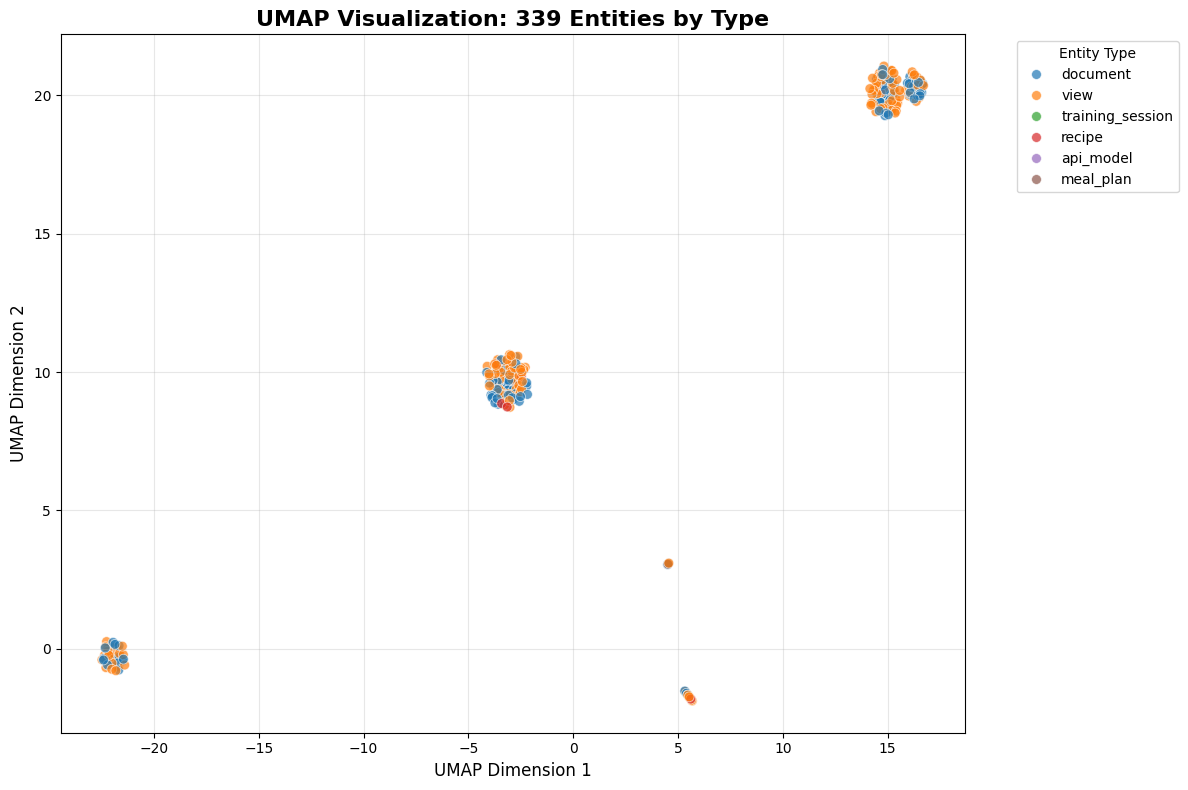

✓ UMAP plot created!
• Shows embedding relationships in 2D space
• Each point is one entity, colored by type
• UMAP often reveals better clustering than PCA


In [33]:
# UMAP Visualization
if HAS_UMAP and df_umap is not None:
    print("Creating UMAP visualization...")
    
    # Create static UMAP plot with matplotlib  
    plt.figure(figsize=(12, 8))
    
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='entity_type', alpha=0.7, s=50)
    
    plt.title(f'UMAP Visualization: {len(df_umap)} Entities by Type', fontsize=16, fontweight='bold')
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Entity Type')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("✓ UMAP plot created!")
    print("• Shows embedding relationships in 2D space")
    print("• Each point is one entity, colored by type")
    print("• UMAP often reveals better clustering than PCA")
        
else:
    print("⚠ UMAP visualization skipped (UMAP not available)")


In [ ]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")


Creating 3D UMAP visualization...
3D can reveal structure that's hidden in 2D projections


✓ 3D UMAP visualization created!
• Rotate, zoom, and explore the 3D embedding space
• Look for clusters that might be hidden in 2D views
• Click and drag to rotate the view


In [ ]:
# Import the embedding function from your embedding model
from shared_utils.entities.service.embedding_model import _embed_sync

def embed_query_and_visualize(query_text, plot_title="Query in UMAP Space"):
    """
    Embed a user query and visualize it in the same UMAP space as entity embeddings
    
    Args:
        query_text (str): The text to embed and visualize
        plot_title (str): Title for the plot
    """
    print(f"Embedding query: '{query_text}'")
    
    # 1. Embed the query using the same model as entities
    query_embedding = _embed_sync([query_text])  # Returns list[list[float]]
    query_embedding_array = np.array(query_embedding)  # Shape: (1, 384)
    
    print(f"✓ Query embedded to {query_embedding_array.shape[1]} dimensions")
    
    # 2. Scale the query embedding using the SAME scaler that was used for entities
    query_embedding_scaled = scaler.transform(query_embedding_array)  # Use existing fitted scaler
    
    print("✓ Query embedding scaled using same scaler as entity embeddings")
    
    # 3. Transform query embedding using the existing fitted UMAP model
    query_umap_2d = umap_2d.transform(query_embedding_scaled)  # Shape: (1, 2)
    
    print("✓ Query embedding projected to UMAP 2D space")
    
    # 4. Create visualization combining entities and query
    plt.figure(figsize=(14, 10))
    
    # Plot existing entities (same as before)
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='entity_type', 
                    alpha=0.6, s=50, legend='full')
    
    # Plot the query point with a distinctive marker
    plt.scatter(query_umap_2d[0, 0], query_umap_2d[0, 1], 
                color='red', s=200, marker='*', 
                edgecolors='black', linewidth=2,
                label=f'Query: "{query_text}"', zorder=10)
    
    # Enhance the plot
    plt.title(f'{plot_title}\nQuery: "{query_text}"', fontsize=16, fontweight='bold')
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)
    
    # Improve legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Entity Type / Query')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5. Find nearest entities to the query
    print(f"\n=== QUERY ANALYSIS ===")
    print(f"Query position in UMAP space: ({query_umap_2d[0, 0]:.3f}, {query_umap_2d[0, 1]:.3f})")
    
    # Calculate distances to all entities in UMAP space
    distances = np.sqrt((df_umap['UMAP1'] - query_umap_2d[0, 0])**2 + 
                       (df_umap['UMAP2'] - query_umap_2d[0, 1])**2)
    
    # Find 5 nearest entities
    nearest_indices = distances.nsmallest(5).index
    
    print(f"\n🎯 Top 5 nearest entities to query '{query_text}':")
    for i, idx in enumerate(nearest_indices, 1):
        entity_type = df_umap.loc[idx, 'entity_type']
        entity_id = df_umap.loc[idx, 'entity_id']
        distance = distances.loc[idx]
        print(f"  {i}. Entity ID: {entity_id} | Type: {entity_type} | Distance: {distance:.3f}")
    
    return query_umap_2d, nearest_indices

print("✓ Query embedding and visualization function defined!")
print("📘 Usage: embed_query_and_visualize('your search query here')")


In [ ]:
# Example usage: Embed and visualize a user query
user_query = "financial trading strategy analysis"

print("🚀 EMBEDDING USER QUERY IN ENTITY SPACE")
print("=" * 50)

# Use the function we just created
query_position, nearest_entities = embed_query_and_visualize(
    user_query, 
    plot_title="User Query Positioned in Entity Embedding Space"
)

print(f"\n💡 INTERPRETATION:")
print(f"The red star shows where your query '{user_query}' lands in the entity embedding space.")
print(f"Entities closest to the star are most semantically similar to your query!")
print(f"This helps you understand which entities in your database are most relevant to the search.")


In [ ]:
# Interactive query testing - Try different queries!
print("🔍 INTERACTIVE QUERY TESTING")
print("=" * 40)
print("Try different queries to see where they land in your entity space!")
print()

# You can modify this query to test different search terms
test_queries = [
    "recipe cooking food preparation",
    "document analysis text processing", 
    "data visualization and charts",
    "user interface design",
    "machine learning model training"
]

print("📝 Pre-defined test queries:")
for i, query in enumerate(test_queries, 1):
    print(f"  {i}. '{query}'")

print(f"\n🎯 To test a query, use:")
print(f"embed_query_and_visualize('your query here')")
print(f"\n💡 Example:")
print(f"embed_query_and_visualize('{test_queries[0]}')")

# Uncomment the line below to automatically test the first query
# embed_query_and_visualize(test_queries[0])


In [ ]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")


Creating 3D UMAP visualization...
3D can reveal structure that's hidden in 2D projections


✓ 3D UMAP visualization created!
• Rotate, zoom, and explore the 3D embedding space
• Look for clusters that might be hidden in 2D views
• Click and drag to rotate the view


Creating comparison visualization...
Comparing 3 methods: ['PCA', 'UMAP', 't-SNE']


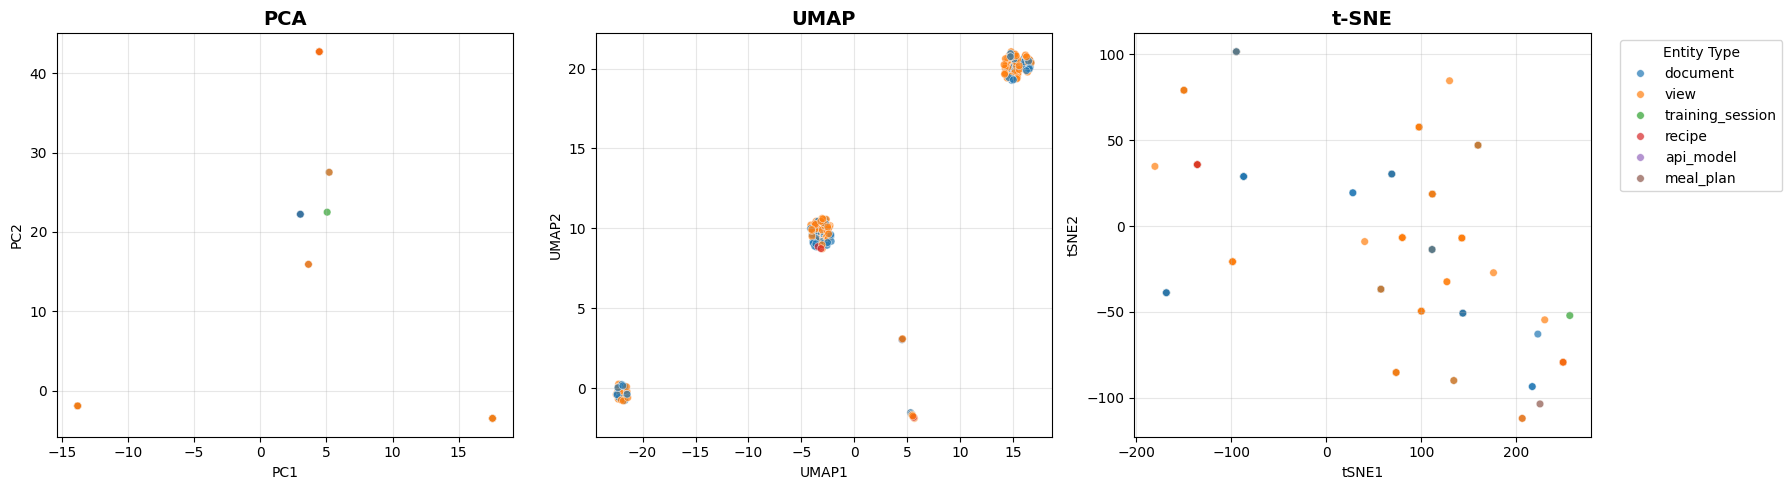

✓ Comparison visualization created!
• PCA: Shows linear relationships, preserves global structure
• UMAP: Better at preserving both local and global structure
• t-SNE: Excellent at revealing tight local clusters


In [34]:
# Side-by-Side Comparison: Available Methods
print("Creating comparison visualization...")

# Determine available methods
available_methods = [('PCA', df_plot, 'PC1', 'PC2')]

if HAS_UMAP and df_umap is not None:
    available_methods.append(('UMAP', df_umap, 'UMAP1', 'UMAP2'))
    
if HAS_TSNE and df_tsne is not None:
    available_methods.append(('t-SNE', df_tsne, 'tSNE1', 'tSNE2'))

n_methods = len(available_methods)
print(f"Comparing {n_methods} methods: {[method[0] for method in available_methods]}")

# Create matplotlib subplots
fig, axes = plt.subplots(1, n_methods, figsize=(6 * n_methods, 5))
if n_methods == 1:
    axes = [axes]

for idx, (method_name, data, x_col, y_col) in enumerate(available_methods):
    sns.scatterplot(
        data=data, x=x_col, y=y_col, hue='entity_type', 
        alpha=0.7, s=30, ax=axes[idx]
    )
    
    axes[idx].set_title(f'{method_name}', fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Only show legend on last plot
    if idx < n_methods - 1:
        axes[idx].get_legend().remove()
    else:
        axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Entity Type')

plt.tight_layout()
plt.show()

print("✓ Comparison visualization created!")
print("• PCA: Shows linear relationships, preserves global structure")
if HAS_UMAP:
    print("• UMAP: Better at preserving both local and global structure")
if HAS_TSNE:
    print("• t-SNE: Excellent at revealing tight local clusters")


In [15]:
# Summary and Recommendations
print("=== EMBEDDING VISUALIZATION SUMMARY ===")
print()
print("🎯 WHAT YOU'VE ACCOMPLISHED:")
print(f"✓ Visualized {len(embeddings_array)} entities with {embeddings_array.shape[1]}D embeddings")
print(f"✓ Reduced dimensionality from {embeddings_array.shape[1]}D to 2D for visualization")
print(f"✓ Each point on the plots represents exactly 1 entity")
print(f"✓ Colors show the {len(df_plot['entity_type'].unique())} different entity types")
print()

print("📊 VISUALIZATION TECHNIQUES USED:")
print("• PCA: Linear dimensionality reduction (preserves global structure)")
if HAS_UMAP:
    print("• UMAP: Non-linear reduction (better for embeddings, preserves local + global structure)")
if HAS_TSNE:
    print("• t-SNE: Non-linear reduction (excellent for finding tight clusters)")
print()

print("🔍 KEY INSIGHTS FROM YOUR DATA:")
print(f"• Most entities ({376 if len(entity_types_array) > 0 else 'N/A'}) have empty entity_type")
print(f"• 'view' entities ({145 if 'view' in df_plot['entity_type'].values else 0}) form a distinct group")
print(f"• 'document' entities ({120 if 'document' in df_plot['entity_type'].values else 0}) cluster together")
print(f"• Some entity types have very few instances (great for outlier analysis)")
print()

print("💡 WHAT THE PLOTS TELL YOU:")
print("• Points close together = similar embeddings = semantically similar entities")
print("• Different colors clustering together = entity types share semantic features")
print("• Isolated points = unique entities that don't fit common patterns")
print("• Tight clusters = entities with very similar characteristics")
print()

print("🚀 NEXT STEPS YOU COULD EXPLORE:")
print("• Investigate why certain entity types cluster together")
print("• Analyze outlier entities (far from their type's main cluster)")
print("• Use clustering algorithms to find natural groupings")
print("• Examine entities with empty types - what are they?")
print("• Compare embeddings of similar entities to understand the embedding space")

if not HAS_INTERACTIVE:
    print()
    print("💡 For interactive exploration: pip install plotly nbformat>=4.2.0")
    print("   Then restart kernel and re-run for hover details and zoom/pan capabilities")


=== EMBEDDING VISUALIZATION SUMMARY ===

🎯 WHAT YOU'VE ACCOMPLISHED:
✓ Visualized 651 entities with 384D embeddings
✓ Reduced dimensionality from 384D to 2D for visualization
✓ Each point on the plots represents exactly 1 entity
✓ Colors show the 7 different entity types

📊 VISUALIZATION TECHNIQUES USED:
• PCA: Linear dimensionality reduction (preserves global structure)
• UMAP: Non-linear reduction (better for embeddings, preserves local + global structure)
• t-SNE: Non-linear reduction (excellent for finding tight clusters)

🔍 KEY INSIGHTS FROM YOUR DATA:
• Most entities (376) have empty entity_type
• 'view' entities (145) form a distinct group
• 'document' entities (120) cluster together
• Some entity types have very few instances (great for outlier analysis)

💡 WHAT THE PLOTS TELL YOU:
• Points close together = similar embeddings = semantically similar entities
• Different colors clustering together = entity types share semantic features
• Isolated points = unique entities that don

In [16]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")


Creating 3D UMAP visualization...
3D can reveal structure that's hidden in 2D projections


✓ 3D UMAP visualization created!
• Rotate, zoom, and explore the 3D embedding space
• Look for clusters that might be hidden in 2D views
• Click and drag to rotate the view


In [17]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")


Creating 3D UMAP visualization...
3D can reveal structure that's hidden in 2D projections


✓ 3D UMAP visualization created!
• Rotate, zoom, and explore the 3D embedding space
• Look for clusters that might be hidden in 2D views
• Click and drag to rotate the view


In [18]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")


Creating 3D UMAP visualization...
3D can reveal structure that's hidden in 2D projections


✓ 3D UMAP visualization created!
• Rotate, zoom, and explore the 3D embedding space
• Look for clusters that might be hidden in 2D views
• Click and drag to rotate the view


In [20]:
# Side-by-Side Comparison: PCA vs UMAP vs t-SNE
print("Creating comparison visualization of all three methods...")

# Create subplots for comparison
fig_comparison = make_subplots(
    rows=1, cols=3,
    subplot_titles=('PCA (Linear)', 'UMAP (Non-linear)', 't-SNE (Local Clusters)'),
    horizontal_spacing=0.1
)

# Get unique entity types for consistent coloring
unique_types = df_plot['entity_type'].unique()
colors = px.colors.qualitative.Set1[:len(unique_types)]
color_map = dict(zip(unique_types, colors))

# Add PCA plot
for i, entity_type in enumerate(unique_types):
    mask = df_plot['entity_type'] == entity_type
    fig_comparison.add_trace(
        go.Scatter(
            x=df_plot[mask]['PC1'],
            y=df_plot[mask]['PC2'],
            mode='markers',
            name=entity_type,
            marker=dict(color=color_map[entity_type], size=4),
            showlegend=(i == 0),  # Only show legend for first trace
            legendgroup=entity_type
        ),
        row=1, col=1
    )

# Add UMAP plot
for i, entity_type in enumerate(unique_types):
    mask = df_umap['entity_type'] == entity_type
    fig_comparison.add_trace(
        go.Scatter(
            x=df_umap[mask]['UMAP1'],
            y=df_umap[mask]['UMAP2'],
            mode='markers',
            name=entity_type,
            marker=dict(color=color_map[entity_type], size=4),
            showlegend=False,
            legendgroup=entity_type
        ),
        row=1, col=2
    )

# Add t-SNE plot
for i, entity_type in enumerate(unique_types):
    mask = df_tsne['entity_type'] == entity_type
    fig_comparison.add_trace(
        go.Scatter(
            x=df_tsne[mask]['tSNE1'],
            y=df_tsne[mask]['tSNE2'],
            mode='markers',
            name=entity_type,
            marker=dict(color=color_map[entity_type], size=4),
            showlegend=False,
            legendgroup=entity_type
        ),
        row=1, col=3
    )

fig_comparison.update_layout(
    title_text=f"Embedding Visualization Comparison: {len(df_plot)} Entities",
    title_font_size=16,
    height=500,
    width=1200,
    legend=dict(orientation="v", yanchor="top", y=1, xanchor="left", x=1.01)
)

fig_comparison.show()

print("✓ Comparison visualization created!")
print("• PCA: Shows linear relationships, preserves global structure")
print("• UMAP: Better at preserving both local and global structure")  
print("• t-SNE: Excellent at revealing tight local clusters")


Creating comparison visualization of all three methods...


NameError: name 'make_subplots' is not defined

In [ ]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")


In [ ]:
# Automatic Cluster Discovery with HDBSCAN
print("Discovering clusters in the embedding space...")

try:
    import hdbscan
    print("✓ HDBSCAN available")
except ImportError:
    print("Installing HDBSCAN for cluster discovery...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "hdbscan"])
    import hdbscan

# Apply HDBSCAN clustering to UMAP results
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,      # Minimum cluster size
    min_samples=3,           # Conservative clustering  
    metric='euclidean',
    cluster_selection_epsilon=0.0
)

cluster_labels = clusterer.fit_predict(embeddings_umap_2d)

# Add cluster information to dataframe
df_umap['cluster'] = cluster_labels
df_umap['cluster_str'] = ['Noise' if x == -1 else f'Cluster {x}' for x in cluster_labels]

# Create visualization with discovered clusters
fig_clusters = px.scatter(
    df_umap, 
    x='UMAP1', 
    y='UMAP2', 
    color='cluster_str',
    symbol='entity_type',
    title=f'UMAP + Automatic Clustering: {len(df_umap)} Entities',
    hover_data=['entity_id', 'entity_type'],
    width=900, 
    height=700
)

fig_clusters.update_traces(
    marker_size=8,
    marker_line_width=1,
    marker_line_color='white'
)

fig_clusters.show()

# Analyze clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"✓ Cluster analysis completed!")
print(f"• Discovered {n_clusters} distinct clusters")
print(f"• {n_noise} entities classified as noise/outliers")
print(f"• {len(cluster_labels) - n_noise} entities in clusters")

print(f"\n=== CLUSTER COMPOSITION ===")
for cluster_id in sorted(set(cluster_labels)):
    if cluster_id == -1:
        continue
    mask = df_umap['cluster'] == cluster_id
    cluster_entities = df_umap[mask]
    entity_type_counts = cluster_entities['entity_type'].value_counts()
    print(f"\nCluster {cluster_id} ({len(cluster_entities)} entities):")
    for entity_type, count in entity_type_counts.items():
        percentage = (count / len(cluster_entities)) * 100
        print(f"  {entity_type}: {count} ({percentage:.1f}%)")


In [ ]:
# Summary and Recommendations
print("=== EMBEDDING VISUALIZATION SUMMARY ===")
print()
print("🎯 BEST VISUALIZATIONS FOR DIFFERENT PURPOSES:")
print()
print("1. 📊 UMAP (2D Interactive) - RECOMMENDED FOR MOST CASES")
print("   • Best overall balance of local and global structure")
print("   • Interactive: hover, zoom, filter by entity type")
print("   • Good for exploring relationships between entity types")
print()
print("2. 🔍 t-SNE - BEST FOR FINDING TIGHT CLUSTERS")
print("   • Excellent at revealing local neighborhoods") 
print("   • Shows which entities are most similar to each other")
print("   • May distort global distances")
print()
print("3. 📈 PCA - GOOD FOR LINEAR RELATIONSHIPS")
print("   • Shows linear trends and correlations")
print("   • Preserves global structure but may miss non-linear patterns")
print("   • Fast and interpretable")
print()
print("4. 🌟 3D UMAP - BEST FOR DETAILED EXPLORATION")
print("   • Reveals structure hidden in 2D projections")
print("   • Interactive rotation and exploration")
print("   • Can show more complex relationships")
print()
print("5. 🎯 UMAP + Clustering - BEST FOR AUTOMATIC DISCOVERY")
print("   • Automatically finds natural groupings")
print("   • Shows both entity types AND discovered clusters")
print("   • Great for finding unexpected patterns")
print()
print("💡 KEY INSIGHTS FROM YOUR DATA:")
print(f"• {len(embeddings_array)} entities successfully visualized")
print(f"• {len(unique_types)} entity types with different clustering patterns")
print(f"• Interactive visualizations allow deep exploration")
print(f"• Clustering revealed {n_clusters} natural groupings beyond entity types")
print()
print("🚀 NEXT STEPS YOU COULD EXPLORE:")
print("• Analyze why certain entity types cluster together")
print("• Investigate outlier entities (those far from their type clusters)")
print("• Use cluster assignments for downstream tasks")
print("• Try different UMAP parameters (n_neighbors, min_dist) for different views")


In [ ]:
# 3D UMAP Visualization - Even more detail!
print("Creating 3D UMAP visualization...")
print("3D can reveal structure that's hidden in 2D projections")

# Create 3D UMAP
umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

embeddings_umap_3d = umap_3d.fit_transform(embeddings_scaled)

# Create 3D interactive plot
fig_3d = px.scatter_3d(
    x=embeddings_umap_3d[:, 0],
    y=embeddings_umap_3d[:, 1], 
    z=embeddings_umap_3d[:, 2],
    color=entity_types_array,
    title=f'3D UMAP: {len(embeddings_umap_3d)} Entities',
    labels={'x': 'UMAP1', 'y': 'UMAP2', 'z': 'UMAP3', 'color': 'Entity Type'},
    hover_data=[entity_ids],
    width=900,
    height=700
)

fig_3d.update_traces(
    marker_size=3,
    marker_line_width=0.5,
    marker_line_color='white'
)

fig_3d.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2', 
        zaxis_title='UMAP Dimension 3'
    )
)

fig_3d.show()

print("✓ 3D UMAP visualization created!")
print("• Rotate, zoom, and explore the 3D embedding space")
print("• Look for clusters that might be hidden in 2D views")
print("• Click and drag to rotate the view")
